In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Coefficient of variation and Fano factor (4 points)

In [7]:
## Load spike times
spike_times = np.loadtxt('SpikeTimes.dat') # in [ms]
spike_times /= 1000 # [ms] to [s].

assert spike_times.shape[0] == 100  # maximum spike-time index.
assert spike_times.shape[1] == 100  # number of trials.

In [15]:
T = 5.5 # # trial length in [s]
time_resolution = 100 # [s]

### (1.a) Make a raster plot of the data.

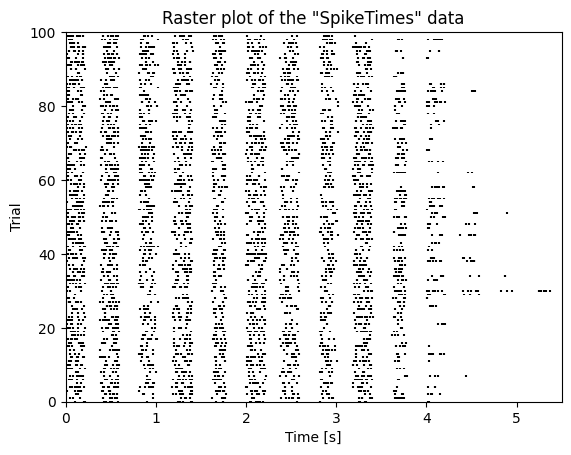

In [105]:
# @param positions: rows are trial and column are spike times.
plt.eventplot(positions=spike_times.T, linelengths=0.5, lineoffsets=1, colors='black')
plt.ylim(0, time_resolution)
plt.xlim(0, T)
plt.title('Raster plot of the "SpikeTimes" data')
plt.xlabel('Time [s]')
plt.ylabel('Trial')
plt.show()

### (1.b) Plot a histogram of the ISIs pooled across trials.

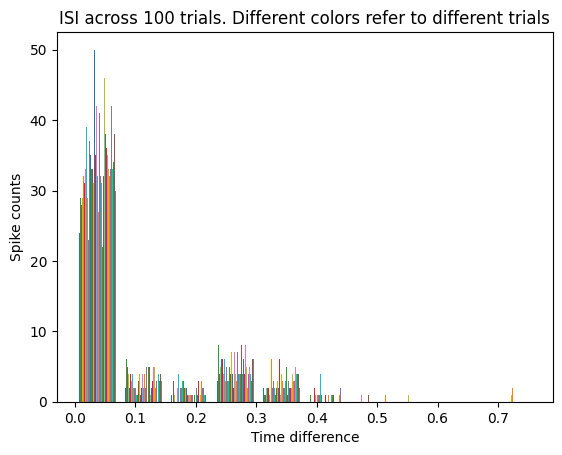

In [181]:

# Create histogram of ISIs
# fig, ax = plt.subplots()
# ax.hist(isis, bins=50)
# ax.set_xlabel('ISI (s)')
# ax.set_ylabel('Count')
# plt.show()

spike_times[~np.isnan(spike_times)].shape

# np.diff(np.array([1,2,3, np.nan,5]))

spike_times * ~np.isnan(spike_times)

np.diff(np.array([1, 2, np.nan, np.nan, 1, 2]))

spike_times[~np.isnan(spike_times)]

# The ISI-list contains 100 lists; each one contains the ISI values of one trial.
ISI = []
for trial in spike_times.T:
    trial_ISI = np.diff(trial[~np.isnan(trial)])
    ISI.append(trial_ISI)
    
plt.hist(ISI)
plt.title('ISI across 100 trials. Different colors refer to different trials')
plt.xlabel('Time difference (ISI)') # TODO: check axis name.
plt.ylabel('Spike counts')
plt.show()